In [1]:
import gym
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import skvideo.io

[2018-04-12 19:13:54,081] Making new env: Pong-v0


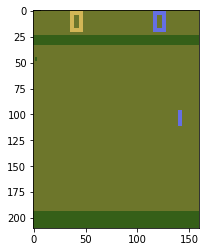

In [66]:
env = gym.make('Pong-v0')
env.reset()

fig = plt.figure()

arr = env.render(mode='rgb_array')

plt.imshow(arr);


In [67]:
arr.shape

(210, 160, 3)

In [68]:
def prepro(I):
    I = I[35:195] # crop
    I = I[::2,::2,0] # downsample by factor of 2
    I[I == 144] = 0 # erase background (background type 1)
    I[I == 109] = 0 # erase background (background type 2)
    I[I != 0] = 1 # everything else (paddles, ball) just set to 1
    return I

In [69]:
prepro(arr).shape

(80, 80)

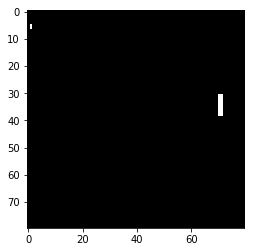

In [94]:
plt.imshow(prepro(arr), interpolation="nearest", cmap="gray");

In [91]:
from collections import deque

n_observations_per_state = 3
preprocessed_observations = deque([], maxlen=n_observations_per_state)
obs = env.reset()
for t in range(1100):
    obs, reward, done, info = env.step(env.action_space.sample())
    preprocessed_observations.append(prepro(obs))

def combine_observations_singlechannel(preprocessed_observations, dim_factor=0.5):
    dimmed_observations = [obs * dim_factor**index
                           for index, obs in enumerate(reversed(preprocessed_observations))]
    return np.max(np.array(dimmed_observations), axis=0)

img2 = combine_observations_singlechannel(preprocessed_observations)

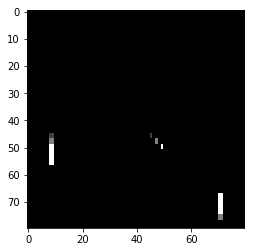

In [92]:
plt.imshow(img2, interpolation="nearest", cmap="gray")

In [25]:
image = []
env.reset()
for t in range(1000):
    obs, reward, done, info = env.step(env.action_space.sample())
    if t >900:
        image.append(env.render(mode='rgb_array'))


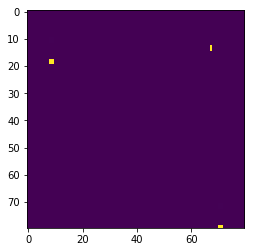

In [33]:
plt.imshow(prepro(image[60])-prepro(image[59]));


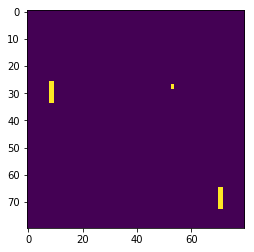

In [27]:
plt.imshow(prepro(image[49]));

In [9]:
env = gym.make('Pong-v0')
env.reset()
episode = 0
writer = skvideo.io.FFmpegWriter("./pong_random_actions.mp4")

while True:
    writer.writeFrame(env.render(mode='rgb_array'))
    obs, reward, done, info = env.step(env.action_space.sample())
    if done:
        break

writer.close()

[2018-04-11 03:31:47,943] Making new env: Pong-v0


In [44]:
def process_image(full_image):
    processed_image = full_image[34:194] #crop image
    processed_image = np.delete(processed_image,list(range(0,16))+list(range(144,170)), axis=1) #remove sides
    processed_image = processed_image[:,:,0]   # remove the second and third RGB value
    mask = binary_dilation(processed_image==236,[np.ones(255)])
    mask[:,[0,1,2,3]]=0 # don't overwrite opponents line
    mask[:,[-1,-2,-3,-4]]=0 # don't overwrite own line 
    processed_image[mask]=236 #increase length of the ball
    processed_image = downsample_image(processed_image)
    processed_image = np.delete(processed_image,list(range(0,15))+list(range(16,31)), axis=1) #significantly 'simplify' the image
    processed_image[processed_image==144] = 0 # Set background to 0
    processed_image[processed_image==236] = -1 # Set ball to -1
    processed_image[processed_image==92] = 1  # Set cursor to 1
    return processed_image

def downsample_image(image):
    return image[::4,::4]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  This is separate from the ipykernel package so we can avoid doing imports until


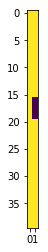

In [45]:
from scipy.ndimage.morphology import binary_dilation
plt.imshow(process_image(arr));